In [7]:
#===============================================
#LIBRERIAS UTILIZADAS
import json
import csv
import pandas as pd
from afinn import Afinn 
import folium
import requests
import branca.colormap as cm
#import statistics as stats
#===============================================

states = ["ak","al","ar","az","ca","co","ct","de","fl","ga","hi","ia","id","il",
          "in","ks","ky","la","ma","md","me","mi","mn","mo","ms","mt","nc","nd","ne","nh",
          "nj","nm","nv","ny","oh","ok","or","pa","ri","sc","sd","tn","tx","ut","va","vt",
          "wa","wi","wv","wy"]

states_names = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado',
'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois',
'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC':'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island',
'SC': 'South Carolina', 'SD': 'South Dakota', 'TN':'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia',
'WA': 'Washington','WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}



In [676]:
def getState(data):
    if data["place"] != None and data["place"]["country_code"] == "US":
        state = str(data["place"]["full_name"]).lower().split(", ")
        if len(state) > 1:
            return state[1]

def isState(state):
    if state in states:
        return True
    return False 

arrayState = {}
def readTweets():
    file = "output.txt"
    array = []
    count=0
    afn = Afinn()
    df = pd.DataFrame([])
    with open(file, "r") as ins:
        for line in ins:          
            if ( len(line)> 1): ## to avoid empty lines 
                data = json.loads(line)
                if "created_at" in data:
                    state = getState(data)
                    if isState(state):
                        if "text" in data:
                            score = afn.score(data["text"]) 
                            #sentiment = ['positive' if score > 0 else 'negative' if score < 0 else 'neutral' for score in scores]
                            if score > 0:
                                sentiment = 'positive'
                                df = df.append({'State': state,'SentimentValue':score,'Sentiment':sentiment}, ignore_index=True)
                                count=count+1
                                countItem=arrayState.get(state,0)
                                if countItem ==0:
                                    arrayState[state]=[score]
                                else:
                                    arrayState[state].append(score)
                            #if score < 0:
                            #    sentiment = 'negative'
                            #if score == 0:
                            #    sentiment = 'neutral'
                            #df = df.append({'State': state,'SentimentValue':score,'Sentiment':sentiment}, ignore_index=True)
                            
                            #count=count+1
                            #countItem=arrayState.get(state,0)
                            #if countItem ==0:
                            #    arrayState[state]=[score]
                            #else:
                            #    arrayState[state].append(score)
    #print(count)
    #print(df)
    #print(arrayState)


In [677]:
readTweets()

In [678]:
dataStateEEUU = {}
dataFrameEEUU = {}
df = pd.DataFrame([])
dfFrame = pd.DataFrame([])
dfFrame5Top = pd.DataFrame([])
for line in states:
    val=arrayState.get(line,[0])
    sent=(sum(val)/len(val))
    dataStateEEUU[line.upper()]=sent
    df = df.append({'State': line.upper(),'Sentiment':round(sent, 1)}, ignore_index=True)

dataFrame = df.sort_values('Sentiment',ascending=False)
dataFrame.head()
print(dataFrame)
print(len(dataFrame))
print(len(states))
count=5 
print('_______________________________________________')
for i in dataFrame.index: 
    if count>0:
        dfFrame = dfFrame.append({'State': dataFrame["State"][i],'Sentiment':dataFrame["Sentiment"][i]}, ignore_index=True)
        count-=1
    else:
        break;
    #
print('==================================================================')
print('LOS 5 ESTADOS FELICES')
print('==================================================================')
print(dfFrame)
count=5
for i in dataFrame.index: 
    if count>0:
        dfFrame5Top = dfFrame5Top.append({'State': dataFrame["State"][i],'Sentiment':dataFrame["Sentiment"][i]}, ignore_index=True)
        count-=1
    else:
        dfFrame5Top = dfFrame5Top.append({'State': dataFrame["State"][i],'Sentiment':0}, ignore_index=True)

#print(dfFrame5Top)

    Sentiment State
49        3.2    WY
7         3.2    DE
11        3.2    IA
3         3.1    AZ
45        3.1    VT
20        3.1    ME
15        3.0    KS
46        3.0    WA
41        3.0    TN
39        3.0    SC
38        3.0    RI
23        3.0    MO
22        3.0    MN
25        3.0    MT
5         3.0    CO
12        3.0    ID
8         3.0    FL
13        3.0    IL
14        2.9    IN
28        2.9    NE
47        2.9    WI
43        2.9    UT
42        2.9    TX
37        2.9    PA
34        2.9    OH
31        2.9    NM
30        2.9    NJ
32        2.9    NV
21        2.9    MI
19        2.9    MD
18        2.9    MA
44        2.8    VA
26        2.8    NC
1         2.8    AL
24        2.8    MS
33        2.8    NY
9         2.8    GA
35        2.8    OK
4         2.8    CA
16        2.8    KY
29        2.8    NH
40        2.8    SD
6         2.7    CT
48        2.7    WV
17        2.7    LA
36        2.7    OR
2         2.7    AR
27        2.6    ND
10        0.0    HI


In [656]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
#state_data = dataStateEEUU
state_data = dfFrame

m = folium.Map(location=[33, -100], zoom_start=4, tiles="Stamen Toner")
print(state_data)
folium.Choropleth(
    state_geo,
    data=state_data,
    columns=["State", "Sentiment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Porcentaje de felicidad (%)",
).add_to(m)


popup = "Sentimiento de Felicidad EEUU"

m

   Sentiment State
0        3.2    WY
1        3.2    DE
2        3.2    IA
3        3.1    AZ
4        3.1    VT


In [572]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
us_states = f"{url}/us-states.json"

geo_json_data = json.loads(requests.get(us_states).text)

data_dict = dataFrame.set_index("State")['Sentiment']

In [654]:
def my_color_function(feature):
    if data_dict[feature["id"]] == 0:
        #GRIS 9b9b9b
        return "#9b9b9b"
    elif data_dict[feature["id"]] >1 and data_dict[feature["id"]] <3:
        #
        return "#808000"
    elif data_dict[feature["id"]] >=3 and data_dict[feature["id"]] <5:
        #return "#ff0000"
        return "#00FF00"

In [687]:
m = folium.Map([32, -90], tiles="cartodbpositron", zoom_start=4)

folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        "fillColor": my_color_function(feature),
        "color": "black",
        "weight": 1,
        "dashArray": "5, 5",
    },
).add_to(m)

m

# MAPA DE LOS 5 ESTADOS MAS FELICES DE LOS ESTADOS UNIDOS

In [680]:
#print(state_data)
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
us_states = f"{url}/us-states.json"

geo_json_data = json.loads(requests.get(us_states).text)

state_Sentimen5Top_dict = dfFrame5Top.set_index("State")['Sentiment']

def color_map(feature):
    if state_Sentimen5Top_dict[feature["id"]] == 0:
        #GRIS 9b9b9b
        return "#9b9b9b"
    elif state_Sentimen5Top_dict[feature["id"]] >1 and state_Sentimen5Top_dict[feature["id"]] <3:
        #
        return "#808000"
    elif state_Sentimen5Top_dict[feature["id"]] >=3 and state_Sentimen5Top_dict[feature["id"]] <5:
        #return "#ff0000"
        return "#00FF00"
print('==================================================================')
print('LOS 5 ESTADOS FELICES')
print('==================================================================')
print(dfFrame)

LOS 5 ESTADOS FELICES
   Sentiment State
0        3.2    WY
1        3.2    DE
2        3.2    IA
3        3.1    AZ
4        3.1    VT


In [685]:
m = folium.Map([30, -100], tiles="cartodbpositron", zoom_start=4)

folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        "fillColor": color_map(feature),
        "color": "black",
        "weight": 2,
        "dashArray": "5, 5",
    },
).add_to(m)

m

# CÓDIGO DE COLOR

### GRIS = NAUTRO  ----  AMARILLO (Olive) = MEDIO    ---- VERDE=ALTO


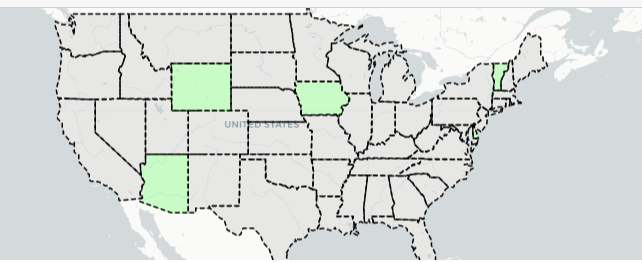

In [649]:
step = cm.StepColormap(
    ["gray", "yellow", "green"], vmin=0, vmax=5, index=[0, 1, 3, 5], caption="step"
)
step

In [688]:
m = folium.Map([33, -100], tiles="cartodbpositron", zoom_start=4)
folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        "fillColor": step(state_Sentimen5Top_dict[feature["id"]]),
        "color": "black",
        "weight": 2,
        "dashArray": "5, 5",
    },
).add_to(m)
m

In [705]:
print("Espa\u00f1a")

España


In [704]:
pip install langdetect

Almería


# Mapa Tweets e Idioma - España
#Realizar un mapa de España que permita ver dónde se tuitea y en qué idioma se tuitea

In [219]:
#Tuitear con Twitter Place
def getInfoGeneral(data):
    result=[]
    if data["place"] != None and data["place"]["country_code"] == "ES" and data["place"]["bounding_box"]["coordinates"] != None:
        state = str(data["place"]["full_name"]).lower().split(", ")
        if len(state) > 1:
            if data["lang"] != None:
                location=data["place"]["bounding_box"]["coordinates"][0][0]
                result = {'City': state[0],'Lang':data["lang"],'Location': [location[1],location[0]]}
    return result

#Tweet con ubicación exacta
def getInfoUser(data):
    result=[]
    if data["place"] != None and data["place"]["country_code"] == "ES":
        state = str(data["place"]["full_name"]).lower().split(", ")
        if len(state) > 1:
            if data["lang"] != None and data["geo"] != None:
                result = {'City': state[0],'Lang':data["lang"],'Location': data["geo"]["coordinates"]}
                #print(result)
    return result

def isStateES(state):
    if state in states:
        return True
    return False 

arrayTweetsGeneralES = []
arrayTweetsExactasES = []
#dfFrame = pd.DataFrame([])
def readTweetsES():
    file = "output.txt"
    with open(file, "r") as ins:
        for line in ins:
            if (len(line)> 1):
                data = json.loads(line)
                if "created_at" in data:
                    datTweetsGeneralES = getInfoGeneral(data)
                    datTweetsExactasES = getInfoUser(data)
                    #Twitter Place >>>>>
                    if len(datTweetsGeneralES)>0:
                        arrayTweetsGeneralES.append(datTweetsGeneralES)
                    #Tweet con ubicación exacta >>>>>
                    if len(datTweetsExactasES)>0:
                        arrayTweetsExactasES.append(datTweetsExactasES)

In [220]:
readTweetsES()

In [221]:
len(arrayTweetsGeneralES)
print(arrayTweetsGeneralES)

[{'City': 'villacarrillo', 'Lang': 'es', 'Location': [38.017264, -3.20038]}, {'City': 'barcelona', 'Lang': 'ca', 'Location': [41.317048, 2.052477]}, {'City': 'fuengirola', 'Lang': 'und', 'Location': [36.519213, -4.636376]}, {'City': 'murcia', 'Lang': 'es', 'Location': [37.715968, -1.385233]}, {'City': 'lorca', 'Lang': 'und', 'Location': [37.421007, -2.013439]}, {'City': 'madrid', 'Lang': 'es', 'Location': [40.312071, -3.889005]}, {'City': 'madrid', 'Lang': 'es', 'Location': [40.312071, -3.889005]}, {'City': 'barcelona', 'Lang': 'es', 'Location': [41.317048, 2.052477]}, {'City': 'munitibar-arbatzegi gerrikaitz', 'Lang': 'und', 'Location': [43.226804, -2.629443]}, {'City': 'tres cantos', 'Lang': 'es', 'Location': [40.582092, -3.811724]}, {'City': 'olesa de montserrat', 'Lang': 'en', 'Location': [41.532654, 1.872591]}, {'City': 'hellín', 'Lang': 'es', 'Location': [38.308679, -1.876376]}, {'City': 'bilbao', 'Lang': 'es', 'Location': [43.213654, -2.98601]}, {'City': 'logroño', 'Lang': 'und'

In [222]:
len(arrayTweetsExactasES)
print(arrayTweetsExactasES)


[{'City': 'vera', 'Lang': 'ca', 'Location': [37.25057, -1.86954]}, {'City': 'sagunto', 'Lang': 'es', 'Location': [39.66546, -0.22975]}, {'City': 'vitoria-gasteiz', 'Lang': 'es', 'Location': [42.85222, -2.67819]}, {'City': 'almadén de la plata', 'Lang': 'und', 'Location': [37.7840652, -6.1101118]}, {'City': 'tarancón', 'Lang': 'es', 'Location': [40.0, -3.0]}, {'City': 'sevilla', 'Lang': 'es', 'Location': [37.4241914, -5.956497]}, {'City': 'sevilla', 'Lang': 'es', 'Location': [37.3438657, -5.9870098]}, {'City': 'rincón de la victoria', 'Lang': 'es', 'Location': [36.73999, -4.24584]}, {'City': 'montoro', 'Lang': 'es', 'Location': [38.01946194, -4.38350594]}, {'City': 'mairena del aljarafe', 'Lang': 'es', 'Location': [37.35301, -6.06157]}, {'City': 'ciempozuelos', 'Lang': 'es', 'Location': [40.15937, -3.61846]}, {'City': 'tudela', 'Lang': 'es', 'Location': [42.06169, -1.60373]}, {'City': 'madrid', 'Lang': 'es', 'Location': [40.4, -3.68333]}, {'City': 'málaga', 'Lang': 'es', 'Location': [36

In [227]:
#print(dfEs)
m = folium.Map([37, -3], tiles="cartodbpositron", zoom_start=5.49, world_copy_jump=True, no_wrap=False)
#m = folium.Map(world_copy_jump=True, no_wrap=False)

for line in arrayTweetsExactasES:
    #print(line)
    [36.737433, -2.543758],
    folium.Marker(
    location=line['Location'],
    popup="Idioma:"+str(line['Lang']),
    ).add_to(m)
m